# Data exploration – rolling demand

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Stringency

In [2]:
# Import response indices data.
response_indices = pd.read_excel('../data/response_indices.xlsx', sheet_name='UK_combined')

# Convert dates to datetime.
response_indices['date'] = pd.to_datetime(response_indices['date'].astype(str),
                                          format ='%Y%m%d')

# Select only the data we are interested in – the government response index (stringency).
stringency = response_indices[['date', 'stringency_index']]

# Check data is correct.
stringency

,date,stringency_index
0,2020-01-01,0.00
1,2020-01-02,0.00
2,2020-01-03,0.00
3,2020-01-04,0.00
4,2020-01-05,0.00
...,...,...
231,2020-08-19,64.35
232,2020-08-20,64.35
233,2020-08-21,64.35
234,2020-08-22,64.35


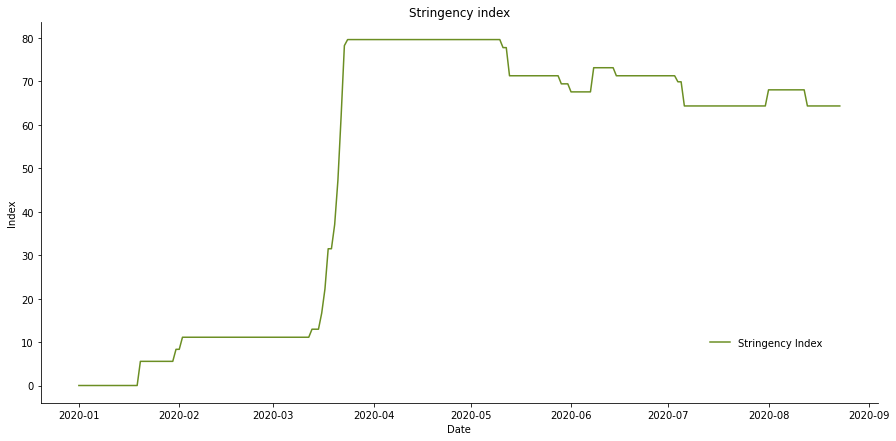

In [3]:
# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))

# Plot data.
plt.plot(stringency['date'], 
         stringency['stringency_index'], 
         color='olivedrab',
         label='Stringency Index')

# Customise plot.
ax.set_title('Stringency index')
ax.set_xlabel('Date')
ax.set_ylabel('Index')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot legend.
leg = ax.legend(frameon=False,
                loc='lower right',
                borderpad=5)

## 2. Demand

In [4]:
# Import data.
demand = pd.read_csv('../data/demand.csv')

# Convert dates to datetime.
demand['date'] = pd.to_datetime(demand['date'].astype(str),
                                format ='%Y-%m-%d %H:%M:%S')

# Check data.
demand

,date,demand_GW
0,2020-01-01 00:00:38,27035
1,2020-01-01 00:05:38,27007
2,2020-01-01 00:10:40,27044
3,2020-01-01 00:15:41,27095
4,2020-01-01 00:20:53,27100
...,...,...
69979,2020-08-30 23:35:35,22169
69980,2020-08-30 23:40:35,22105
69981,2020-08-30 23:45:34,21989
69982,2020-08-30 23:50:35,21867


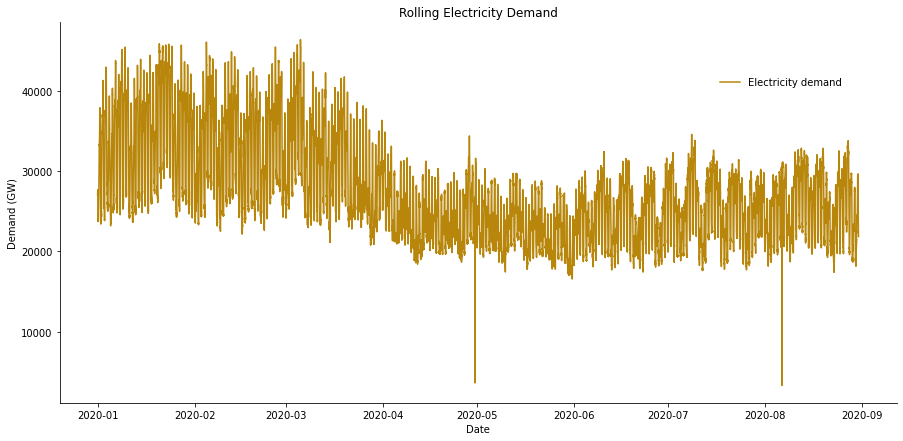

In [5]:
# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))

# Plot data.
plt.plot(demand['date'],
         demand['demand_GW'],
         color='darkgoldenrod',
         label='Electricity demand')

# Customise plot.
ax.set_title('Rolling Electricity Demand')
ax.set_xlabel('Date')
ax.set_ylabel('Demand (GW)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot legend.
leg = ax.legend(frameon=False,
                loc='upper right',
                borderpad=5)

This data is way too noisy. It contains the demand every half hour throughout each day. I will export the data as a csv to manipulate in MySQL. I will find the average demand for each day.

In [6]:
# Create csv file to export to SQL (dates moved from index to own datetime column).
# demand.to_csv('../data/demand_sql.csv')

In [7]:
# Import csv file created in MySQL.
avg_daily_demand = pd.read_csv('../data/avg_demand_d.csv')

# Convert dates to datetime.
avg_daily_demand['day'] = pd.to_datetime(avg_daily_demand['day'].astype(str),
                                          format ='%Y-%m-%d')

avg_daily_demand.head()

,day,demand_GW
0,2020-01-01,29766.8958
1,2020-01-02,32312.1736
2,2020-01-03,33184.1701
3,2020-01-04,31027.0729
4,2020-01-05,30484.1076


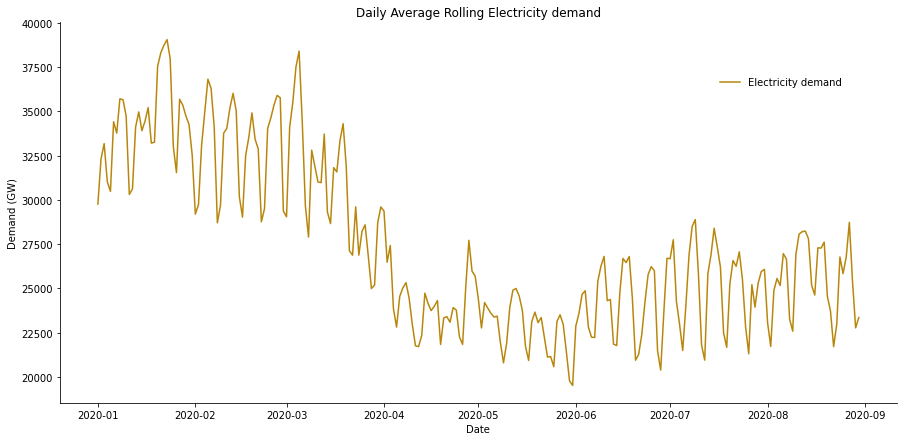

In [8]:
# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))

# Plot data.
plt.plot(avg_daily_demand['day'],
         avg_daily_demand['demand_GW'],
         color='darkgoldenrod',
         label='Electricity demand')

# Customise plot.
ax.set_title('Daily Average Rolling Electricity demand')
ax.set_xlabel('Date')
ax.set_ylabel('Demand (GW)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot legend.
leg = ax.legend(frameon=False,
                loc='upper right',
                borderpad=5)

## 3. Stringency and demand (daily)

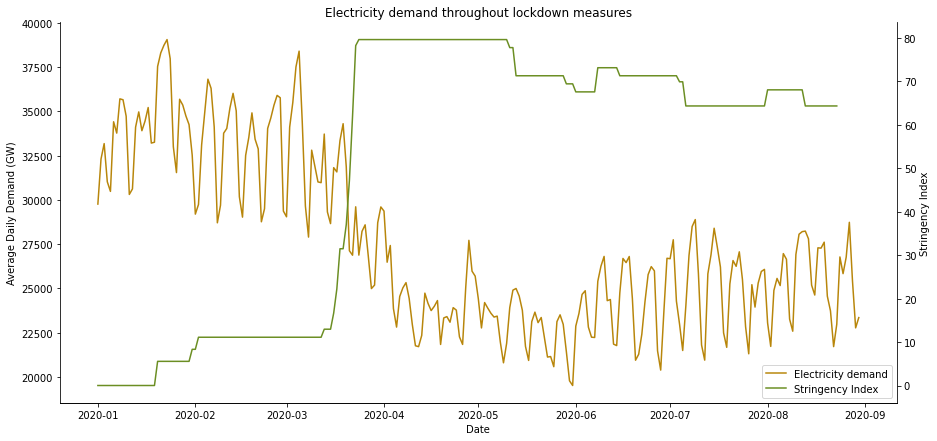

In [9]:
# Plot demand.
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Daily Demand (GW)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.plot(avg_daily_demand['day'],
         avg_daily_demand['demand_GW'],
         color='darkgoldenrod',
         label='Electricity demand')

# Plot government response index.
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.plot(stringency['date'], 
         stringency['stringency_index'], 
         color='olivedrab',
         label='Stringency Index')

# Plot legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

leg = ax2.legend(lines + lines2, labels + labels2,
                 frameon=True,
                 loc='lower right')

# Add title.
ax1.set_title('Electricity demand throughout lockdown measures'); # add ; to stop text printing out above plot

This looks good but there is still a lot of noise in the data. I think it is because there is a decrease in demand at weekends. I will see if I can plot by week.

## 4. Stringency and demand (weekly)

In [10]:
# Import csv file created in MySQL.
avg_weekly_demand = pd.read_csv('../data/avg_demand_wk.csv')

# Convert last date in the week to datetime.
avg_weekly_demand['last_date_of_week'] = pd.to_datetime(avg_weekly_demand['last_date_of_week'].astype(str),
                                                        format = '%Y-%m-%d')

# Check data.
avg_weekly_demand.head()

,week,last_date_of_week,demand_GW
0,1,2020-01-05,31354.8840
1,2,2020-01-12,33605.2068
2,3,2020-01-19,34165.1002
3,4,2020-01-26,36597.0040
4,5,2020-02-02,33075.7386


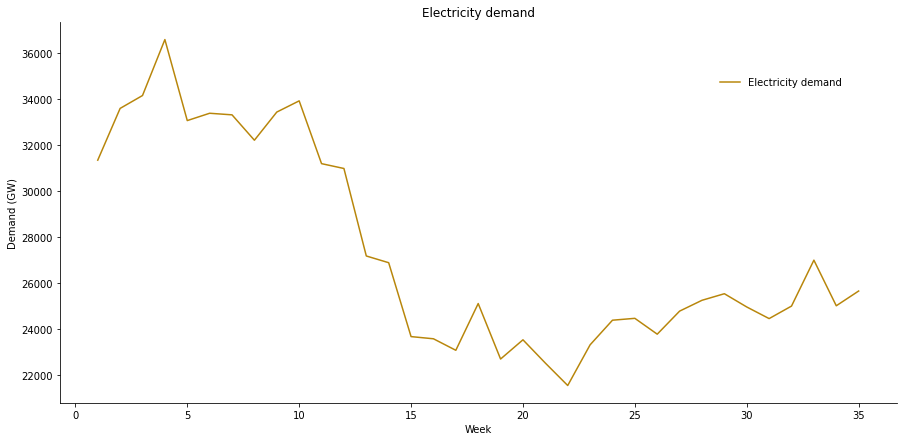

In [11]:
# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))

# Plot data.
plt.plot(avg_weekly_demand['week'],
         avg_weekly_demand['demand_GW'],
         color='darkgoldenrod',
         label='Electricity demand')

# Customise plot.
ax.set_title('Electricity demand')
ax.set_xlabel('Week')
ax.set_ylabel('Demand (GW)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot legend.
leg = ax.legend(frameon=False,
                loc='upper right',
                borderpad=5)

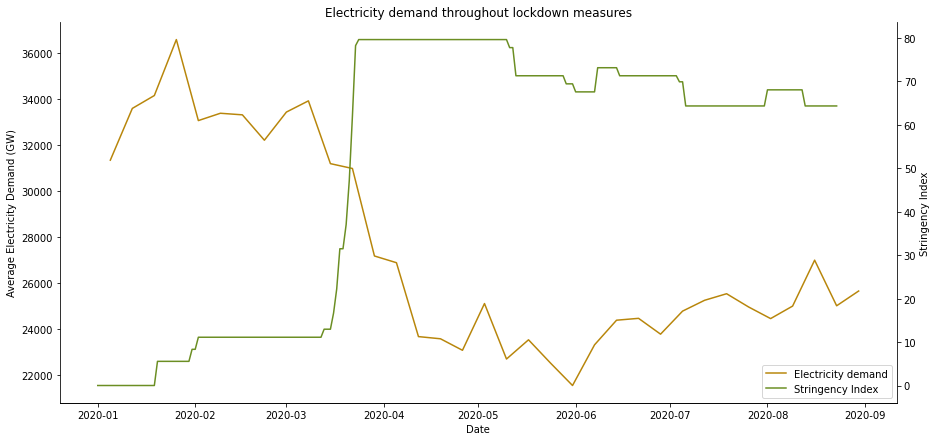

In [12]:
# Plot demand.
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Electricity Demand (GW)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.plot(avg_weekly_demand['last_date_of_week'],
         avg_weekly_demand['demand_GW'],
         color='darkgoldenrod',
         label='Electricity demand')

# Plot government response index.
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.plot(stringency['date'], 
         stringency['stringency_index'], 
         color='olivedrab',
         label='Stringency Index')

# Plot legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

leg = ax2.legend(lines + lines2, labels + labels2,
                 frameon=True,
                 loc='lower right')

# Add title.
ax1.set_title('Electricity demand throughout lockdown measures');